In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

Punto A

In [2]:
States = np.array([0,1]) 
Prior =  np.array([0.2,0.8])

In [3]:
T = np.array([[0.8,0.2],[0.2,0.8]])
E = np.array([[0.5,0.9],[0.5,0.1]])

In [4]:
DictH = {0:'Justa',1:'Sesgada'}
DictH[0]

'Justa'

In [5]:
DictO = {0:'Cara',1:'Sello'}
DictO[1]

'Sello'

In [6]:
Obs = np.array([1,0,0,0,1,0,1,0])

In [7]:
def GetHiddenStates(States, N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
    
    print(CStates)
    return np.array(Permu)

In [8]:
HiddenStates = GetHiddenStates(States,8)
HiddenStates

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

Punto B

In [9]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0] ]
    
    for i in range(n-1):
        p *= T[ State[i+1], State[i] ]
    
    
    
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
    
    return p

In [15]:
dim = HiddenStates.shape[0]
P = np.zeros(dim)

for i in range(dim):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

In [11]:
PObs = np.sum(P)
print(PObs)

0.0019344381513984013


In [25]:
max_P = np.max(P)
ii = np.where( P == np.amax(P))
print(HiddenStates[ii],max_P)

[[1 1 1 1 0 0 0 0]] 0.0001911029760000001


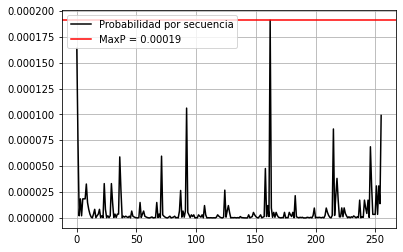

In [13]:
plt.plot(P,color='k')
plt.axhline(y=maxP,color='r')
plt.legend(['Probabilidad por secuencia','MaxP = 0.00019'])
plt.grid(axis='both')

Punto C

In [20]:

ObsStates = GetHiddenStates(States,8)

NObs = ObsStates.shape[0]

PObs = np.zeros(NObs)

for j in range(NObs):
    
    dim = HiddenStates.shape[0]
    Prob = np.zeros(dim)
    
    for i in range(dim):
        Prob[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(Prob)



[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [34]:
max_P2 = np.max(PObs)
ii_2 = np.where( PObs == np.amax(PObs))
print( f'Estados Observables: {ObsStates[ii_2]}')
print( f'Probabilidad máxima: {max_P2}')

Estados Observables: [[0 0 0 0 0 0 0 0]]
Probabilidad máxima: 0.13698241367042568


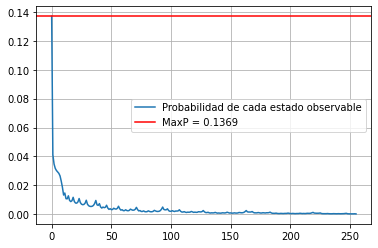

In [36]:
plt.plot(PObs)
np.sum(PObs)
plt.grid(axis ='both')
plt.axhline(y = max_P2, color='r')
plt.legend(['Probabilidad de cada estado observable' , 'MaxP = 0.1369'])
plt.show()

Punto D

In [39]:
sum_total = np.sum(PObs)

print(sum_total)

1.0000000000000007


Punto E



¿Depende el resultado de la probabilidad a-priori?

El resultado si depende de la probabilidad a-priori dado que esta distribución tiene en cuenta los valores iniciales propuestos para la elaboración del método. De acuerdo a esto  se puede decir que de igual manera la probabilidad de las secuencias dependera si el valor de la probabilidad a-priori es alterado. 